In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('chronic_kidney_disease.csv')
df = pd.DataFrame(data)
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
1,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
2,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
3,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
4,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd


In [3]:
df.shape

(399, 25)

In [4]:
# Replace class values to 0 and 1 numeric: 1: CKD, 0: not ckd. This is our target.
df=df.replace({'ckd':1, 'notckd':0})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     390 non-null    float64
 1   bp      387 non-null    float64
 2   sg      352 non-null    float64
 3   al      353 non-null    float64
 4   su      350 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      334 non-null    object 
 7   pcc     395 non-null    object 
 8   ba      395 non-null    object 
 9   bgr     355 non-null    float64
 10  bu      380 non-null    float64
 11  sc      382 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    347 non-null    float64
 15  pcv     328 non-null    float64
 16  wbcc    293 non-null    float64
 17  rbcc    268 non-null    float64
 18  htn     397 non-null    object 
 19  dm      397 non-null    object 
 20  cad     397 non-null    object 
 21  appet   398 non-null    object 
 22  pe

In [6]:
# copy df for modelisation later
df2=df.copy()

In [7]:
# mode as the most frequent value
# My idea is to find the mode but according to the class
# To use it with groupby I will use value_counts in aggregate function (take the one value (index) with the most counts)

df.groupby('class').agg(lambda x:x.value_counts().index[0])

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
class,,,,,,,,,,,,,,,,,,,,,
0,47.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.0,48.0,6700.0,4.5,no,no,no,good,no,no
1,65.0,70.0,1.01,0.0,0.0,normal,normal,notpresent,notpresent,93.0,...,10.9,32.0,9800.0,3.9,yes,yes,no,good,no,no


In [8]:
# Imputing data using the mode
for col in df.columns:
    df[col]= df.groupby('class')[col].apply(lambda x: x.fillna(x.mode()[0]))

In [9]:
df['age'] = df['age'].astype(int)

In [10]:
# Separating numeracical feature and categorical features
cat_cols = [col for col in df.columns if df[col].dtype=='object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [11]:
# categorical without 'class'
cat_cols2 = [col for col in df[cat_cols] if col!='class']

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[cat_cols2] = df[cat_cols2].apply(le.fit_transform)

In [13]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,7,50.0,1.020,4.0,0.0,1,1,0,0,93.0,...,38.0,6000.0,3.9,0,0,0,0,0,0,1
1,62,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.9,0,1,0,1,0,1,1
2,48,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
3,51,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1
4,60,90.0,1.015,3.0,0.0,1,1,0,0,74.0,...,39.0,7800.0,4.4,1,1,0,0,1,0,1


In [14]:
X = df.loc[:, df.columns != 'class']
y = df['class']

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model_scaler = scaler.fit(X)
X_scaled = model_scaler.transform(X)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20) #20% data test set, 80% train set

Feature Importance

In [17]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier() # choosing tree classifier to know importances but there are other methods
 
model.fit(X_train, y_train)
 
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':model.feature_importances_})
df_sorted=feature_importances.sort_values('feature_importance',ascending=False)
df_sorted.head(10)

,features,feature_importance
14,hemo,0.251778
2,sg,0.169480
17,rbcc,0.157504
15,pcv,0.101554
11,sc,0.088607
3,al,0.053608
19,dm,0.035352
18,htn,0.033093
9,bgr,0.030227
12,sod,0.020940


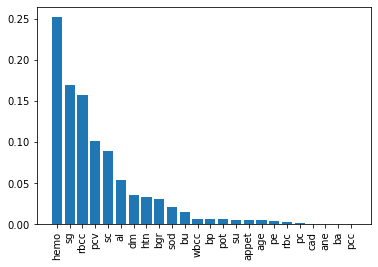

In [18]:
plt.bar(data=df_sorted, x='features', height='feature_importance')
plt.xticks(rotation='vertical')
plt.show()

Important features: hemo, sg, pcv, rbcc, al, dm, htn

In [19]:
selected_features = ['hemo', 'sg', 'pcv','rbcc','al','dm','htn','sod','bgr', 'class']

<AxesSubplot:>

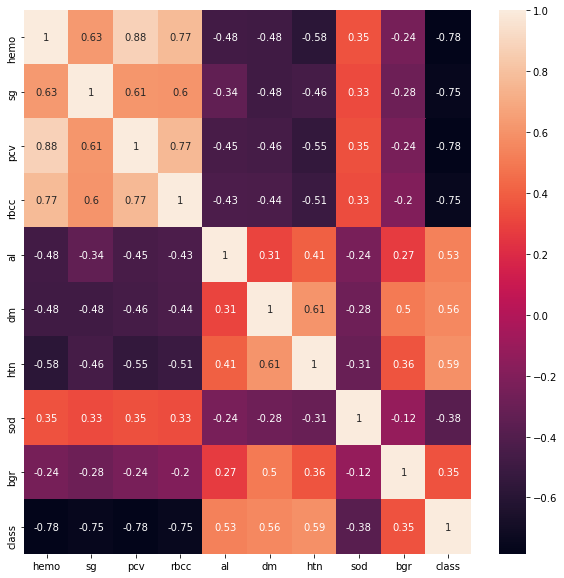

In [20]:
# seeing correlations between features
correlation = df[selected_features].corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot=True,ax=ax)

<AxesSubplot:>

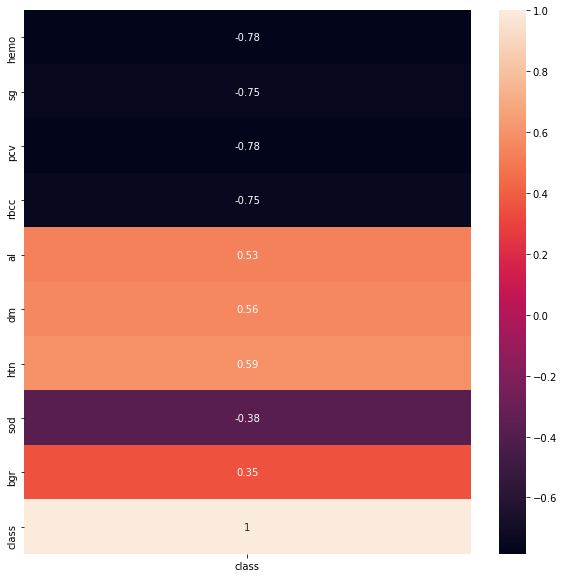

In [21]:
# seeing correlations with class only
correlation = df[selected_features].corr()[['class']]

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot=True,ax=ax)

Clustering (unsupervised learning to identify decease subvariants)

In [22]:
# To define subtypes, study CKD only
df_ckd=df.loc[df['class']==1]

In [23]:
features = ['hemo', 'sg', 'pcv','rbcc','al','dm','htn'] # keep features above 0.5
X = df_ckd[features]
y = df_ckd['class']

In [24]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


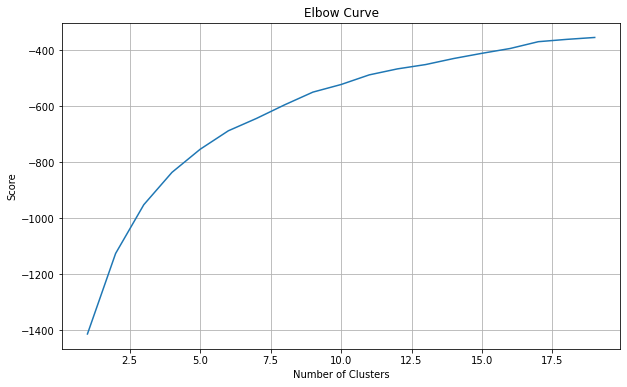

In [26]:
from sklearn.cluster import KMeans

# Check right number of clusters
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(X_train) for i in n_cluster]
scores = [kmeans[i].score(X_train) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.grid()
plt.show();

In [27]:
km = KMeans(n_clusters = 5, random_state=1234, init = 'k-means++') 
#parameters: cretes ransom number generator, 'k-means++' selects initial cluster centers for k-mean clustering in a smart way
km.fit(X_scaled)
# get labels
labels = km.labels_

In [28]:
df_c = df_ckd[['hemo', 'sg', 'pcv','rbcc','al','dm','htn','sod','bgr', 'class','age']]
df_c['clusters'] = labels
df_c

<ipython-input-28-f9f2a329b815>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['clusters'] = labels


,hemo,sg,pcv,rbcc,al,dm,htn,sod,bgr,class,age,clusters
0,11.3,1.020,38.0,3.9,4.0,0,0,135.0,93.0,1,7,1
1,9.6,1.010,31.0,3.9,2.0,1,0,135.0,423.0,1,62,0
2,11.2,1.005,32.0,3.9,4.0,0,1,111.0,117.0,1,48,0
3,11.6,1.010,35.0,4.6,2.0,0,0,135.0,106.0,1,51,1
4,12.2,1.015,39.0,4.4,3.0,1,1,142.0,74.0,1,60,2
...,...,...,...,...,...,...,...,...,...,...,...,...
244,6.3,1.010,19.0,2.6,0.0,0,1,135.0,103.0,1,48,4
245,8.6,1.015,26.0,2.5,3.0,0,1,120.0,106.0,1,48,4
246,10.9,1.025,28.0,3.9,1.0,0,0,140.0,150.0,1,54,1
247,12.6,1.010,37.0,4.1,1.0,1,1,138.0,424.0,1,59,2


In [29]:
# a dataframe to see clusters repartition
res=pd.DataFrame(data=df_c.groupby("clusters").apply(lambda df_c:df_c.hemo.max()), columns=['hemo_max'])
res['rbcc_max'] = df_c.groupby("clusters").apply(lambda df_c:df_c.rbcc.max())
res['pcv_max'] = df_c.groupby("clusters").apply(lambda df_c:df_c.pcv.max())
#res['class'] = df_c.groupby("clusters").apply(lambda df_c:set(df_c['class']))
res['dm'] = df_c.groupby("clusters").apply(lambda df_c:set(df_c['dm']))
res['htn'] = df_c.groupby("clusters").apply(lambda df_c:set(df_c['htn']))
res['sg'] = df_c.groupby("clusters").apply(lambda df_c:set(df_c['sg']))
res['al'] = df_c.groupby("clusters").apply(lambda df_c:set(df_c['al']))
res['age_min'] = df_c.groupby("clusters").apply(lambda df_c:df_c.age.min())
res['age_max'] = df_c.groupby("clusters").apply(lambda df_c:df_c.age.max())

res['count'] = df_c.groupby("clusters").clusters.count() # number of sites in a cluster
res

,hemo_max,rbcc_max,pcv_max,dm,htn,sg,al,age_min,age_max,count
clusters,,,,,,,,,,
0,12.1,5.0,37.0,"{0, 1}","{0, 1}","{1.01, 1.015, 1.005}","{0.0, 1.0, 2.0, 3.0, 4.0}",38,81,74
1,14.0,4.9,42.0,{0},{0},"{1.02, 1.025, 1.005, 1.015, 1.01}","{0.0, 1.0, 2.0, 3.0, 4.0}",2,73,64
2,16.1,8.0,52.0,"{0, 1}","{0, 1}","{1.02, 1.015, 1.01}","{0.0, 1.0, 2.0, 3.0, 4.0}",11,82,37
3,12.7,4.9,39.0,"{0, 1}","{0, 1}","{1.015, 1.025, 1.02}","{0.0, 1.0, 2.0, 3.0, 4.0}",15,90,38
4,9.7,3.9,31.0,"{0, 1}","{0, 1}","{1.02, 1.015, 1.025, 1.005, 1.01}","{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}",21,83,36


5 Clusters description:   
Cluster 0: hypertension, good sugar level and minor diabetes, low blood levels >> severe cases  
Cluster 1: no hypertension nor diabetes, good hemo level but low red cells >> less severe cases    
Cluster 2: most good levels, hypertension >> moderate cases  
Cluster 3: hypertension, high sugar level, low blood levels >> severe cases  
Cluster 4: lowest hemo, red blood cells and cells volume levels >> most severe cases  

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

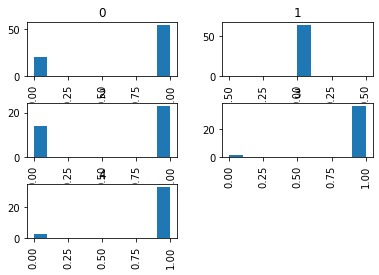

In [30]:
df_c['htn'].hist(by=df_c['clusters'])

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

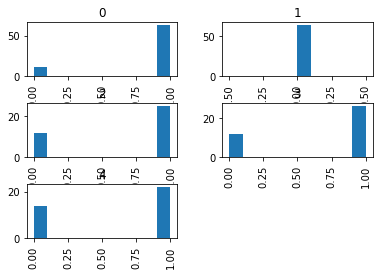

In [31]:
df_c['dm'].hist(by=df_c['clusters'])

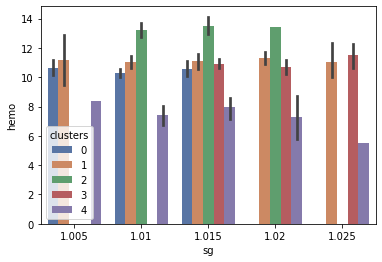

In [32]:
sns.barplot(data=df_c, x="sg", y="hemo", hue="clusters", palette="deep")
plt.show()

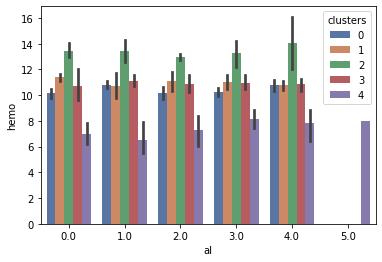

In [33]:
sns.barplot(data=df_c, x="al", y="hemo", hue="clusters", palette="deep")
plt.show()

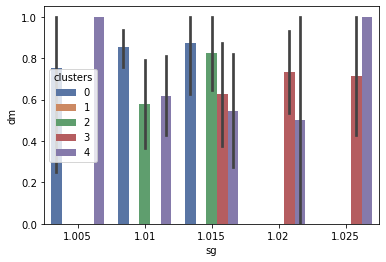

In [34]:
sns.barplot(data=df_c, x="sg", y="dm", hue="clusters", palette="deep")
plt.show()

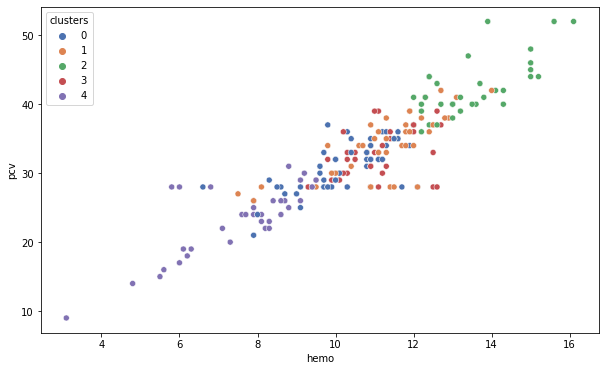

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df_c, x="hemo", y="pcv", hue="clusters", legend="full", palette="deep", ax=ax)
plt.show()

Conclusion on risk factors: diabetes and hypertension, also low cells volume and red blood cells indicate a decease.  
For hemoglobin, good level is situated: for male is 13 to 17 gms and female is 12 to 15 gms.

Model Pipeline

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
X = df2.drop(['class'],axis=1)
y = df2['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
X.shape

(399, 24)

In [40]:
y.shape

(399,)

In [59]:
# set numerical and categorical columns for columns transformation
numerical = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
categorical= ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'] #except class target

# pipeline for categorical features
cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='constant')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore'))]) # LabelEncoder not adapted, better use OrdinalEncoder or OneHotEncoder
 
# pipeline for numerical features
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), # impute values using median
                     ('scaler', MinMaxScaler())])
 
# create column transformer to add to main pipeline
preprocessor = ColumnTransformer(transformers=[('cat', cat_pipe, categorical),
                                               ('num', num_pipe, numerical)])
 

#choosed model
rfc = RandomForestClassifier()

# create main pipeline with transformator and estimator
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', rfc)])

# model's parameters for grid search
# add model prefix to params
param_grid = [{
    'model__max_depth': list(range(1, 10)),
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_features': ['auto', 'sqrt', 'log2']}]

# create grid search
grid = GridSearchCV(pipeline, param_grid)

# fit on data
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['rbc',
                                                                          'pc',
                                                                          'pcc',
                                                                          'ba',
                                                                          'htn',
                                                                          'dm',
                                                                          'cad',
                                                                          'appet',
                                                                          'pe',
                                                                          'ane']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'bp',
                                                                          'sg',
                                                                          'al',
                                                                          'su',
                                                                          'bgr',
                                                                          'bu',
                                                                          'sc',
                                                                          'sod',
                                                                          'pot',
                                                                          'hemo',
                                                                          'pcv',
                                                                          'wbcc',
                                                                          'rbcc'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid=[{'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'model__max_features': ['auto', 'sqrt', 'log2'],
                          'model__n_estimators': [10, 50, 100, 200]}])

In [60]:
# print best model parameters according to grid search
print(grid.best_params_) 

{'model__max_depth': 3, 'model__max_features': 'log2', 'model__n_estimators': 200}


Displaying pipeline diagram

In [49]:
from sklearn import set_config

set_config(display="diagram")
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['rbc', 'pc', 'pcc', 'ba',
                                                   'htn', 'dm', 'cad', 'appet',
                                                   'pe', 'ane']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bp', 'sg', 'al',
                                                   'su', 'bgr', 'bu', 'sc',
                                                   'sod', 'pot', 'hemo', 'pcv',
                                                   'wbcc', 'rbcc'])])),
                ('model', RandomForestClassifier())])

In [61]:
from sklearn.metrics import accuracy_score

y_pred = grid.predict(X_test)

accuracy_score(y_test, y_pred)

0.9875